# Title
by Zaki Aslam, Hector Palafox Prieto, Jennifer Tsang, and Samrawit Mezgebo Tsegay

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import lognorm, randint

# Summary

Here is the summary of our project...

- similar to the "About" section in the README

# Introduction

- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

# Methods & Results

## Data

## Analysis

- describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
    - loads data from the original source on the web
    - wrangles and cleans the data from it’s original (downloaded) format to the format necessary for the planned
    - classification or clustering analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification analysis
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification analysis
    - performs classification or regression analysis
    - creates a visualization of the result of the analysis
- note: all tables and figure should have a figure/table number and a legend

In [2]:
# loads data from the original source on the web
url = (
    "https://opendata.vancouver.ca/api/explore/v2.1/"
    "catalog/datasets/food-vendors/exports/"
    "csv?lang=en&timezone=America%2FLos_Angeles"
    "&use_labels=true&delimiter=%3B"
)
food_vendors = pd.read_csv(url, sep = ";")

food_vendors

,KEY,VENDOR_TYPE,STATUS,BUSINESS_NAME,LOCATION,DESCRIPTION,GEO_LOCALAREA,Geom,geo_point_2d
0,EB04,vendor_food,open,NaN,South Side of 1700 Beach Ave - East Side of Bi...,Hot Dogs,West End,"{""coordinates"": [-123.142926123068, 49.2844925...","49.2844925173, -123.142926123"
1,OD05,vendor_food,open,NaN,South Side of 1700 East Broadway - 37 Metres E...,Hot Dogs,Kensington-Cedar Cottage,"{""coordinates"": [-123.069072741187, 49.2622160...","49.2622160477, -123.069072741"
2,DT10,vendor_food,open,NaN,Expo Boulevard - 20 Metres West of Abbott St,Hot Dogs,Downtown,"{""coordinates"": [-123.108008079327, 49.2787930...","49.2787930538, -123.108008079"
3,C18,vendor_food,open,Aussie Pie Guy,Authorised Parking Meter - 1000 W Pender St,Australian Pies,Downtown,"{""coordinates"": [-123.118192426382, 49.2869519...","49.2869519782, -123.118192426"
4,C17,vendor_food,open,Le Tigre,Authorised Parking Meter North Side of Alberni...,Chinese Cuisine,West End,"{""coordinates"": [-123.12561890857, 49.28659154...","49.2865915482, -123.125618909"
...,...,...,...,...,...,...,...,...,...
86,DT52,vendor_food,open,Japadog,West Side of 800 Burrard St - 2.5 Metres North...,Hot Dogs,West End,"{""coordinates"": [-123.124363670916, 49.2824199...","49.2824199268, -123.124363671"
87,GM10,vendor_food,open,Potato Tornado,West Side of 800 Granville St - 6 Metres South...,Potato Based Dishes,Downtown,"{""coordinates"": [-123.120079603127, 49.2812971...","49.2812971849, -123.120079603"
88,C25,vendor_food,open,Roaming Dragon,Authorised Parking Meter East Side of 1600 Man...,Asian Fusion,Mount Pleasant,"{""coordinates"": [-123.106548732322, 49.2713078...","49.2713078459, -123.106548732"
89,C26,vendor_food,open,Super Thai,Authorised Parking Meter North Side of 1000 W ...,Thai Cuisine,Downtown,"{""coordinates"": [-123.122623764676, 49.2855321...","49.285532115, -123.122623765"


In [3]:
# data wrangling and cleaning

# dropping irrelevant columns
clean_food = food_vendors.drop(columns=['KEY', 'VENDOR_TYPE', 'STATUS'])

clean_food["is_hotdog"] = clean_food["DESCRIPTION"] == "Hot Dogs"
clean_food["BUSINESS_NAME"] = clean_food["BUSINESS_NAME"].fillna("")

clean_food.head()

,BUSINESS_NAME,LOCATION,DESCRIPTION,GEO_LOCALAREA,Geom,geo_point_2d,is_hotdog
0,,South Side of 1700 Beach Ave - East Side of Bi...,Hot Dogs,West End,"{""coordinates"": [-123.142926123068, 49.2844925...","49.2844925173, -123.142926123",True
1,,South Side of 1700 East Broadway - 37 Metres E...,Hot Dogs,Kensington-Cedar Cottage,"{""coordinates"": [-123.069072741187, 49.2622160...","49.2622160477, -123.069072741",True
2,,Expo Boulevard - 20 Metres West of Abbott St,Hot Dogs,Downtown,"{""coordinates"": [-123.108008079327, 49.2787930...","49.2787930538, -123.108008079",True
3,Aussie Pie Guy,Authorised Parking Meter - 1000 W Pender St,Australian Pies,Downtown,"{""coordinates"": [-123.118192426382, 49.2869519...","49.2869519782, -123.118192426",False
4,Le Tigre,Authorised Parking Meter North Side of Alberni...,Chinese Cuisine,West End,"{""coordinates"": [-123.12561890857, 49.28659154...","49.2865915482, -123.125618909",False


In [4]:
# create train and test split

train_data, test_data = train_test_split(
    clean_food, train_size=0.7, random_state=522
)


In [5]:
# summary EDA, identify missing and NAN values

train_data["text_is_na"] = train_data["BUSINESS_NAME"] == ""
train_data["is_hotdog"] = train_data["DESCRIPTION"] == "Hot Dogs"

(
    alt.Chart(train_data).mark_bar().encode(
        x="count()",
        y=alt.Y("DESCRIPTION").sort('-x')
    )

    | alt.Chart(train_data).mark_bar().encode(
        x="text_is_na",
        y="is_hotdog",
        color="count()"
    )
)

alt.HConcatChart(...)

In [6]:
# Data visualization for EDA


In [7]:
def build_pipeline(model):
    return make_pipeline(
        CountVectorizer(),
        model
    )

In [8]:
# classification/regression analysis

X_train = train_data["BUSINESS_NAME"]
y_train = train_data["is_hotdog"]

X_test = test_data["BUSINESS_NAME"]
y_test = test_data["is_hotdog"]

bag_of_words = build_pipeline(DummyClassifier())
bag_of_words.fit(X_train, y_train)
vocab = bag_of_words.named_steps["countvectorizer"].get_feature_names_out()

In [9]:
# look at the proportion of each class for train and test data

data_proportion = pd.DataFrame({
    "train": y_train.value_counts(normalize=True),
    "test": y_test.value_counts(normalize=True)})

data_proportion

,train,test
is_hotdog,,
False,0.634921,0.714286
True,0.365079,0.285714


In [10]:
# dummy classifier as baseline

dummy = DummyClassifier()
dummy_scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(dummy_scores)

,fit_time,score_time,test_score,train_score
0,0.000351,0.000398,0.615385,0.640000
1,0.000217,0.000296,0.615385,0.640000
2,0.000404,0.000292,0.615385,0.640000
3,0.000205,0.000279,0.666667,0.627451
4,0.000195,0.000276,0.666667,0.627451


In [11]:
# dummy accuracy

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7142857142857143

In [12]:
# classification/regression analysis 2


naive_bayes = build_pipeline(BernoulliNB())

pd.DataFrame(
    cross_validate(
        naive_bayes,
        X_train,
        y_train,
        cv=5,
        return_train_score=True,
    )
).agg(['mean', 'std']).round(3).T

,mean,std
fit_time,0.002,0.001
score_time,0.001,0.000
test_score,0.717,0.081
train_score,0.810,0.026


In [13]:
naive_bayes.fit(X_train, y_train)

naive_bayes.score(X_test, y_test)

0.7857142857142857

In [14]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = build_pipeline(LogisticRegression(random_state=522))

lr_score = cross_validate(lr, X_train, y_train, return_train_score=True)
pd.DataFrame(lr_score)

,fit_time,score_time,test_score,train_score
0,0.008143,0.001113,0.615385,0.780000
1,0.002308,0.000480,0.615385,0.820000
2,0.002136,0.000577,0.615385,0.840000
3,0.001629,0.000431,0.833333,0.784314
4,0.001601,0.000436,0.750000,0.823529


In [15]:
# fit model and look at the classes for the model

lr.fit(X_train, y_train)

lr.classes_

array([False,  True])

In [16]:
# to look at the probability score for examples with wrong predictions

data_dict = {
    "y": y_train,
    "y_hat": lr.predict(X_train).tolist(),
    "probabilities": lr.predict_proba(X_train).tolist(),
}

df = pd.DataFrame(data_dict)

df_mismatch = df[df["y"] != df["y_hat"]]
df_mismatch

,y,y_hat,probabilities
65,True,False,"[0.5801395239309264, 0.4198604760690736]"
80,True,False,"[0.5801395239309264, 0.4198604760690736]"
68,True,False,"[0.5801395239309264, 0.4198604760690736]"
64,False,True,"[0.39714167842535353, 0.6028583215746465]"
2,True,False,"[0.5801395239309264, 0.4198604760690736]"
31,True,False,"[0.5801395239309264, 0.4198604760690736]"
79,True,False,"[0.5801395239309264, 0.4198604760690736]"
33,True,False,"[0.5801395239309264, 0.4198604760690736]"
44,True,False,"[0.5801395239309264, 0.4198604760690736]"
8,True,False,"[0.5801395239309264, 0.4198604760690736]"


In [17]:
lr.score(X_test, y_test)

0.7857142857142857

In [18]:
# visualization of the result of the analysis


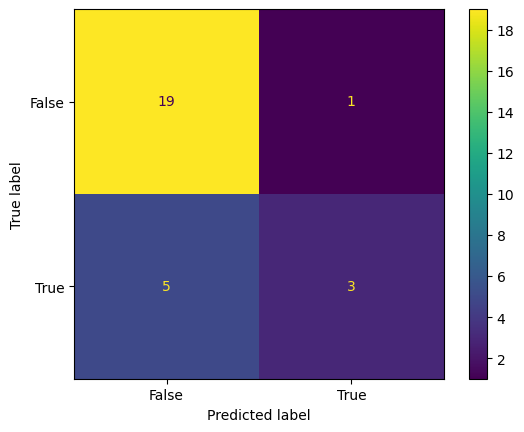

In [19]:
# confusion matrix for test predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

cm = ConfusionMatrixDisplay.from_estimator(
    lr,
    X_test,
    y_test,
    values_format="d"
)

# Discussion

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

Ideas
- Talk about the probability predictions for the logistric regression, the confidence of the model prediction
- Talk about the confusion matrix
    - it would be ideal if the each class would represent roughly 50–50% of the samples
    - our data is somewhat imbalanced, it is not severe so we didn't make adjustments
- Discuss the overall result using the two models
- What other ways can we optimize the current model
    - hyperparameter tuning
    - using `class_weight` to balance dataset
- What other models can we consider in the future
...

# References

at least 4 citations relevant to the project (format is your choose, just be consistent across the references).

# Note:
- Make sure to render to PDF form and push to GitHub.
- Everyone should contribute equally to the code and writing!
- Git commit messages should be meaningful; they will be marked!
- Use GitHub issues to assign tasks and communicate!
- Proper grammar and full sentences in README